# Importing Required Libraries and Modules

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

In [3]:
train_data_dir = 'Aug_Img_Dataset/training_set'
validation_data_dir = 'Aug_Img_Dataset/test_set'

In [4]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical',
        shuffle=True)

Found 1200 images belonging to 3 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 120 images belonging to 3 classes.


In [7]:
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

# Using NAdam Optimizer

In [22]:
from keras.optimizers import Nadam
optimizer = Nadam(lr=0.001)

In [23]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#sigmoid

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 32)       

In [24]:
import pydot
import graphviz

In [25]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [26]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

# Using Callbacks (Checkpoint,EarlyStopping and ReduceLROnPlateau)

In [27]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_NAdam132')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightsNAdam1.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=5,
                                   min_lr=1e-4)
 

# Running the Model and Saving it

In [28]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesNAdam1.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 76s 4s/step - loss: 1.1026 - accuracy: 0.3403 - val_loss: 1.0903 - val_accuracy: 0.3333
Epoch 2/20
18/18 [==============================] - 73s 4s/step - loss: 1.0889 - accuracy: 0.3576 - val_loss: 1.0145 - val_accuracy: 0.5000
Epoch 3/20
18/18 [==============================] - 71s 4s/step - loss: 1.0338 - accuracy: 0.4618 - val_loss: 1.0662 - val_accuracy: 0.4917
Epoch 4/20
18/18 [==============================] - 72s 4s/step - loss: 1.0557 - accuracy: 0.4236 - val_loss: 1.0940 - val_accuracy: 0.6167
Epoch 5/20
18/18 [==============================] - 72s 4s/step - loss: 0.9775 - accuracy: 0.5278 - val_loss: 0.9439 - val_accuracy: 0.6917
Epoch 6/20
18/18 [==============================] - 72s 4s/step - loss: 1.0024 - accuracy: 0.5312 - val_loss: 0.8443 - val_accuracy: 0.6250
Epoch 7/20
18/18 [==============================] - 71s 4s/step - loss: 0.9323 - accuracy: 0.5660 - val_loss: 0.7595 - val_accuracy: 0.6917
Epoch 8/20
18/18 [==

# Adjusting Learning Rate from .001 to .01

In [66]:
from keras.optimizers import Nadam
optimizer = Nadam(lr=0.002)

In [67]:
batch_size= 15
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#sigmoid

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_49 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_50 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 32)       

In [68]:
import pydot
import graphviz

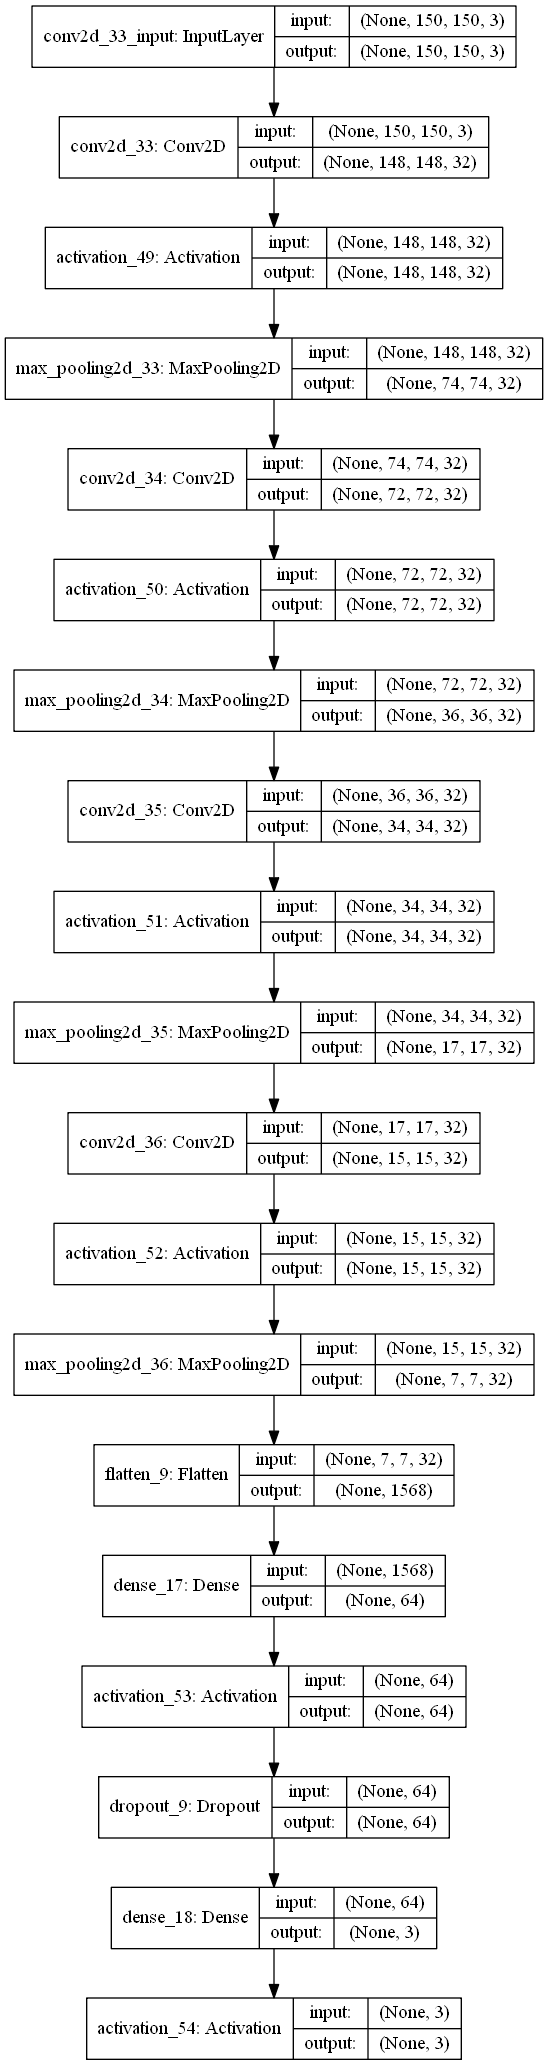

In [69]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [70]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

In [71]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_NAdam122')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightsNAdam2.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=5,
                                   min_lr=1e-4)
 

In [72]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesNAdam2.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 83s 5s/step - loss: 1.1290 - accuracy: 0.3507 - val_loss: 1.0896 - val_accuracy: 0.3583
Epoch 2/20
18/18 [==============================] - 70s 4s/step - loss: 1.1021 - accuracy: 0.3611 - val_loss: 1.0784 - val_accuracy: 0.5500
Epoch 3/20
18/18 [==============================] - 70s 4s/step - loss: 1.0983 - accuracy: 0.4479 - val_loss: 0.9596 - val_accuracy: 0.5500
Epoch 4/20
18/18 [==============================] - 69s 4s/step - loss: 1.0797 - accuracy: 0.4236 - val_loss: 0.9385 - val_accuracy: 0.6250
Epoch 5/20
18/18 [==============================] - 70s 4s/step - loss: 1.0206 - accuracy: 0.4965 - val_loss: 1.0682 - val_accuracy: 0.6750
Epoch 6/20
18/18 [==============================] - 81s 5s/step - loss: 0.9921 - accuracy: 0.4722 - val_loss: 0.8280 - val_accuracy: 0.6167
Epoch 7/20
18/18 [==============================] - 122s 7s/step - loss: 1.0150 - accuracy: 0.4826 - val_loss: 0.8664 - val_accuracy: 0.6500
Epoch 8/20
18/18 [=